In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import copy
from matplotlib import colors
from collections import defaultdict

In [3]:
import urllib.request as request
import pandas as pd
import geopandas as gpd
from datetime import datetime

Gather data from Italy and Hubei province to check the difference. Notice that the Hubei data are available from the moment in which the number of infected people was greater than 400, and a significant change was made during the outbreak in the way the cases were counted.

In [4]:
data_it = []

url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
csv_file = request.urlopen(url).read().decode('utf8').split('\n')
csv_reader = csv.DictReader(csv_file)
    
for row in csv_reader:
    data_it.append(int(row['totale_casi']))
        
days_it = np.arange(0,len(data_it), 1)

In [5]:
data_hub = []
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
csv_file = request.urlopen(url).read().decode('utf8').split("\n")
csv_reader = csv.DictReader(csv_file)


for row in csv_reader:
    if row['Country/Region'] == 'China':
        if row['Province/State'] == 'Hubei':
            data_hub = np.array(list(row.values())[4:-1]).astype('int')
                
days_hub = np.arange(0,len(data_hub), 1)

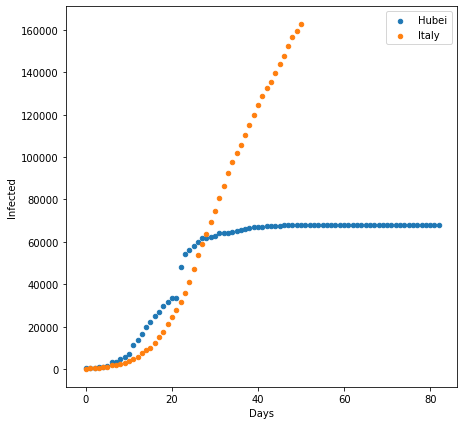

In [6]:
plt.figure(figsize=(7,7))
data_it = np.array(data_it)
plt.scatter(days_hub, data_hub, label = 'Hubei', s = 20)
plt.scatter(np.array(days_it[data_it > days_hub[0]]), data_it[data_it > days_hub[0]], label = 'Italy', s = 20)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Infected')
plt.savefig('italy_hubei.png', dpi = 300, bbox_inches = 'tight')
plt.show()

This might suggest that Italy is still in growing in a sub-exponential fashion no plateau in sight, whereas Hubei around day 25 started to show a very strong slowing-down in the number of new infections.

However, we should note that we should shift the temporal axis for each curve since we don't really know when each outbreak started. If we do this for Italy vs Hubei, and for other countries as well, we find a remarkable superposition at least in the initial exponential phase of the outbreak.

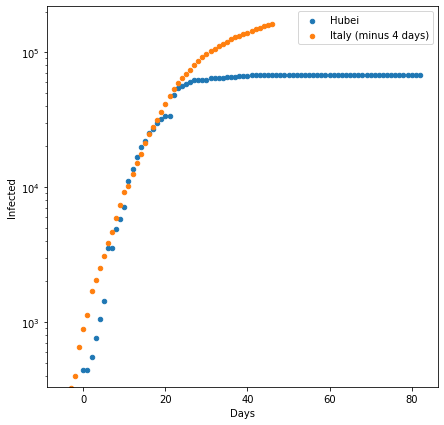

In [7]:
plt.figure(figsize=(7,7))
data_it = np.array(data_it)
plt.scatter(days_hub, data_hub, label = 'Hubei', s = 20)
plt.scatter(np.array(days_it[data_it > days_hub[0]])-4, data_it[data_it > days_hub[0]], label = 'Italy (minus 4 days)', s = 20)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Infected')
plt.yscale('log')
plt.savefig('italy_hubei_tras.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In a log scale, we see the sub-exponential increase of Italy's cases and a possible plateau should be reached in 10-20 days. The decrease in the infection rate is remarkably slower than Hubei's, and this is the case for almost all of the major countries in the world.

If we look at the active cases, we see that we are approaching the peak as of 14/04/2020, and the decrease should start in a matter of days. Notice that this is thightly related to the number of tests carried out; see below.

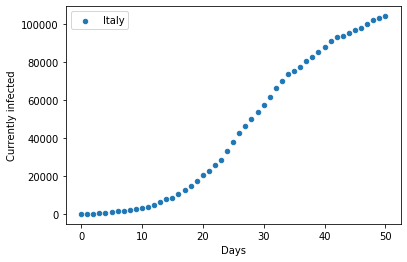

In [8]:
data_it_current = []

url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
csv_file = request.urlopen(url).read().decode('utf8').split('\n')
csv_reader = csv.DictReader(csv_file)
    
for row in csv_reader:
    data_it_current.append(int(row['totale_positivi']))
    
plt.scatter(days_it, data_it_current, label = 'Italy', s = 20)
plt.xlabel('Days')
plt.ylabel('Currently infected')
plt.legend()
plt.show()

In [11]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

clist = ['Italy', 'Spain', 'Germany', 'US', 'France', 'United Kingdom', 'Netherlands', 'Belgium', 'Austria']
tlist = []

for country in clist:
    temp = []
    
    csv_file = request.urlopen(url).read().decode('utf8').split("\n")
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Country/Region'] == country:
            temp.append(np.array(list(row.values())[4:]).astype('int'))
    tlist.append(np.sum(temp, axis = 0))

In [12]:
url= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dlist = []

for country in clist:
    temp = []
    
    csv_file = request.urlopen(url).read().decode('utf8').split("\n")
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Country/Region'] == country:
            temp.append(np.array(list(row.values())[4:]).astype('int'))
    dlist.append(np.sum(temp, axis = 0))
        

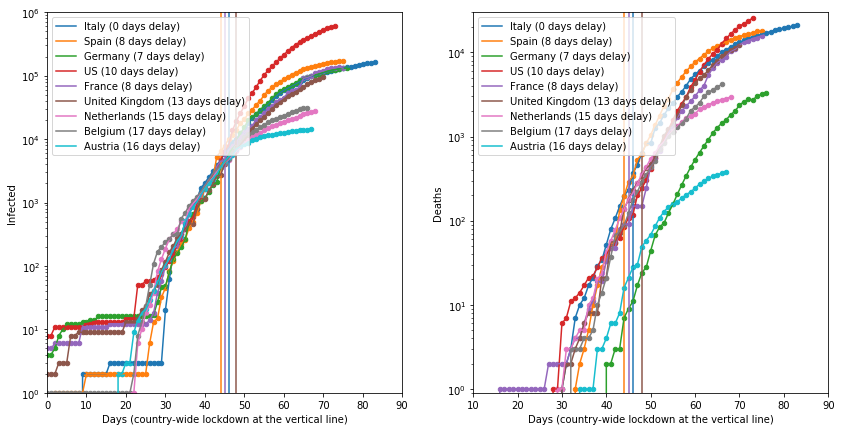

In [13]:
days = [np.arange(0, len(t), 1) for t in tlist]
days_t = [0, 8, 7, 10, 8, 13, 15, 17, 16]
ld_list = [46, 52, None, None, 53, 61, None, None, None] # 46 is the index for 09/03, 52 for 15/03
                                                        # 61 for 24/03

colorlist = plt.cm.tab10(np.linspace(0,len(days_t)/10,len(days_t)))    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,7))

for x, y, l, dt, ld, c in zip(days, tlist, clist, days_t, ld_list, colorlist):
    ax[0].plot(x-dt,y, label = l + ' (' + str(dt) + ' days delay)', color = c)
    ax[0].scatter(x-dt,y, color = c, s= 20)
    if ld != None:
        ax[0].axvline(x=ld-dt, color = c)
        
ax[0].set_xlabel('Days (country-wide lockdown at the vertical line)')
ax[0].set_ylabel('Infected')
ax[0].set_yscale('log')
ax[0].set_xlim(0,90)
ax[0].set_ylim(1,1000000)
ax[0].legend(loc = 2)

for x, y, l, dt, ld, c in zip(days, dlist, clist, days_t, ld_list, colorlist):
    ax[1].plot(x-dt,y, label = l + ' (' + str(dt) + ' days delay)', color = c)
    ax[1].scatter(x-dt,y, color = c, s = 20)
    if ld != None:
        ax[1].axvline(x=ld-dt, color = c)
    
ax[1].set_xlabel('Days (country-wide lockdown at the vertical line)')
ax[1].set_ylabel('Deaths')
ax[1].set_yscale('log')
ax[1].set_xlim(10,90)
ax[1].set_ylim(0.9,30000)
ax[1].legend(loc = 2)

plt.savefig('countries.png', dpi = 300, bbox_inches = 'tight')
plt.show()

All major countries are following the same curve after an initial transient, and only the US show a significant divergence from the others. This might be due to the way we count the infections, but at the same time it is a strong suggestion that all countries will find themselves in an identical situation in the long time limit. At the same time, the death rate is substantially different, suggesting that there might be some mismatchs in how the COVID-related deaths are counted with respect to the infections. However, note that all the curves increase in a similar way, so some of them might just be more delayed.

In some countries there seem to be a stronger slow-down. However, this should be compared with the number of tests done as it is not trivial to understand how well the number of infected people reflect the real size of the outbreak. The number od deaths is a more reliable metric probably.

We now build a worldwide dataframe and plot a map.

In [14]:
def read_country_timeseries(csv_files):
    data = defaultdict(list)
    result = defaultdict(list)
    for name in csv_files:
        csv_reader = csv.DictReader(csv_files[name])
        for row in csv_reader:
            data[row['Country/Region']].append(np.array(list(row.values())[4:]).astype('int'))
        for key in data:
            result[key].append(sum(data[key]))
        data.clear()
    return result

def world_df():
    url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
    url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

    url_list = [url_confirmed, url_deaths, url_recovered]
    fnames = ['confirmed', 'deaths', 'recovered']
    csv_files = {}
    for name, url in zip(fnames, url_list):
        csv_files[name] = request.urlopen(url).read().decode('utf8').split("\n")

    # get the list of the countries in the csv file
    csv_reader = csv.DictReader(csv_files['confirmed'])
    countries_list = []
    for row in csv_reader:
        countries_list.append(row['Country/Region'])
    df = pd.DataFrame(read_country_timeseries(csv_files)).T
    df.columns = fnames
    return df

In [15]:
world_ts_df = world_df()

In [16]:
def current(arr):
    return arr[-1]

cworld_df = world_ts_df.applymap(current)

In [17]:
cworld_df.sort_values('confirmed', ascending = False).head(10)

,confirmed,deaths,recovered
US,607670,25832,47763
Spain,172541,18056,67504
Italy,162488,21067,37130
France,131361,15748,29098
Germany,131359,3294,68200
United Kingdom,94845,12129,323
China,83306,3345,78200
Iran,74877,4683,48129
Turkey,65111,1403,4799
Belgium,31119,4157,6868


This is the last day-to-day data.

In [18]:
def current_increment(arr):
    return np.diff(arr)[-1]
    
iworld_df = world_ts_df.applymap(current_increment)
iworld_df.sort_values('confirmed', ascending = False).head(10)

,confirmed,deaths,recovered
US,27051,2303,4281
United Kingdom,5275,782,19
Turkey,4062,107,842
Italy,2972,602,1695
Russia,2774,22,224
Spain,2442,300,2777
Brazil,1832,204,2873
Iran,1574,98,2146
Canada,1355,120,452
Germany,1287,100,3900


In [19]:
countries_top = list(cworld_df.sort_values('confirmed', ascending = False).head(5).index)

def increment(arr):
    return np.diff(arr)
iworld_ts_df = world_ts_df.applymap(increment)

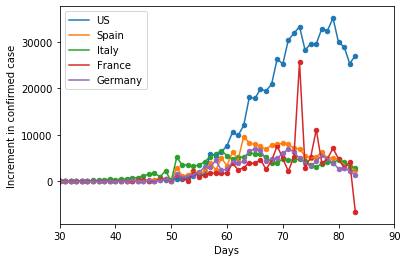

In [20]:
for cname, color in zip(countries_top, colorlist):
    temp_df = iworld_ts_df.loc[[cname]]
    data = list(temp_df['confirmed'])[0]
    plt.plot(np.arange(1,len(data)+1,1), data, label = cname, color = color)
    plt.scatter(np.arange(1,len(data)+1,1), data, s = 20, color = color)
plt.xlabel('Days')
plt.ylabel('Increment in confirmed case')
plt.xlim(30,90)
plt.legend()
plt.show()    

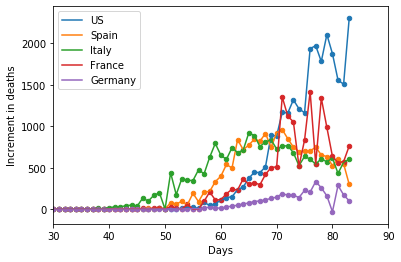

In [21]:
for cname, color in zip(countries_top, colorlist):
    temp_df = iworld_ts_df.loc[[cname]]
    data = list(temp_df['deaths'])[0]
    plt.plot(np.arange(1,len(data)+1,1), data, label = cname, color = color)
    plt.scatter(np.arange(1,len(data)+1,1), data, s = 20, color = color)
plt.xlabel('Days')
plt.ylabel('Increment in deaths')
plt.xlim(30,90)
plt.legend()
plt.show()    

In [22]:
def get_df_data(df, fname, new_name = 'Regions'):
    tlist = df[fname].to_list()

    tdict = dict(zip([new_name,fname],[df.index.to_list(), tlist]))
    new_df = pd.DataFrame(tdict)

    return new_df

get_df_data(cworld_df, 'confirmed', new_name = 'name')

,name,confirmed
0,Afghanistan,714
1,Albania,475
2,Algeria,2070
3,Andorra,659
4,Angola,19
...,...,...
180,Malawi,16
181,South Sudan,4
182,Western Sahara,6
183,Sao Tome and Principe,4


In [23]:
worldmap_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

worldmap_df.drop(worldmap_df.index[worldmap_df['name'] == 'Antarctica'], inplace = True)
worldmap_df.drop(worldmap_df.index[worldmap_df['name'] == 'Fr. S. Antarctic Lands'], inplace = True)

In [24]:
name_old = ['United States of America', 'Dominican Rep.', "Côte d'Ivoire", 'Macedonia', 'South Korea', 'Palestine',
            'Central African Rep.', 'Bosnia and Herz.', 'Taiwan', 'Eq. Guinea', 'Dem. Rep. Congo',
            'Congo', 'eSwatini']
name_new = ['US', 'Dominican Republic', "Cote d'Ivoire", 'North Macedonia', 'Korea, South', 'West Bank and Gaza',
            'Central African Republic', 'Bosnia and Herzegovina', 'Taiwan*', 'Equatorial Guinea', 'Congo (Kinshasa)',
            'Congo (Brazzaville)', 'Eswatini']

In [25]:
for nold, nnew in zip(name_old, name_new):
    idx = worldmap_df.index[worldmap_df['name'] == nold]
    worldmap_df.at[idx, 'name'] =  nnew

In [ ]:
list(set(list(worldmap_df['name']))-set(list(cworld_df.index.values)))

In [ ]:
list(set(list(cworld_df.index.values)) - set(list(worldmap_df['name'])))

In [28]:
confirmed_world = get_df_data(cworld_df, 'confirmed', new_name = 'name')
merged_world = worldmap_df.set_index('name').join(confirmed_world.set_index('name'))

In [29]:
merged_world['log_value'] = np.log10(merged_world['confirmed'])
merged_world

,pop_est,continent,iso_a3,gdp_md_est,geometry,confirmed,log_value
name,,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",16.0,1.204120
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",53.0,1.724276
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",27034.0,4.431910
US,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",607670.0,5.783668
...,...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",4465.0,3.649821
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",283.0,2.451786
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",387.0,2.587711


C:\Users\Giorgio\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


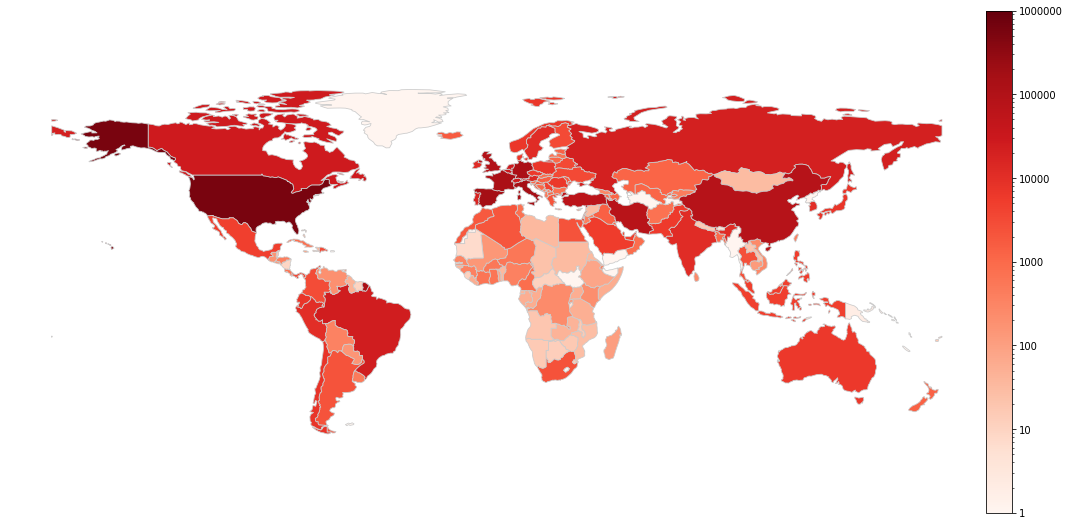

In [30]:
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis('off')
merged_world.plot(column = 'log_value', cmap = 'Reds', ax = ax, linewidth = 0.8,
                  edgecolor = '0.8', vmin = 0, vmax = 6, legend = False)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=colors.LogNorm(vmin=1, vmax=10**6))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.025, pad=0)
cbar.ax.set_yticklabels([1, 10, 100, 1000, 10000, 100000, 1000000]) 
plt.savefig('world.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Now let's gather the data region-by-region in Italy.

In [31]:
def read_italy_region(region_name, *args):
    fields = [[] for _ in args]
    
    url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
    csv_file = request.urlopen(url).read().decode('utf8').split("\n")
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        if row['denominazione_regione'] == region_name:
            for i, arg in enumerate(args):
                fields[i].append(int(row[arg]))
                    
    return fields

In [32]:
fields_names = ["totale_casi", "totale_positivi", "deceduti", "dimessi_guariti", "tamponi",
                "totale_ospedalizzati", "terapia_intensiva"]
#fields_names_lab = ['Totale casi', 'Totale positivi', 'Deceduti', 'Guariti', 'Tamponi',
#                    'Ospedalizzati', 'Terapia intensiva']

fields_names_lab = ['Infected', 'Current cases', 'Deaths', 'Recovered', 'Tested', 'Hospitalized', 'Intensive care']

regions_list = []

url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
csv_file = request.urlopen(url).read().decode('utf8').split("\n")
csv_reader = csv.DictReader(csv_file)
line_count = 0
for row in csv_reader:
    regions_list.append(row['denominazione_regione'])
        
regions_list = list(set(regions_list))

In [33]:
def create_dict(regions_list, fields_names):
    rlist = []
    for region_name in regions_list:
        temp = zip(fields_names, read_italy_region(region_name, *fields_names))
        rlist.append(dict(temp))

    return dict(zip(regions_list, rlist))

In [34]:
r_timeseries = create_dict(regions_list, fields_names)

In [35]:
regions_dataframe = pd.DataFrame(r_timeseries).T

Let's look at what might seem as the top four regions in Italy, Lombardia, Emilia-Romagna, Piemonte and Veneto.

In [36]:
nlist = ['Veneto', 'Lombardia', 'Emilia-Romagna', 'Piemonte']

def plot_comparison(regions_dataframe, nlist, fname, fname_lab):
    for name in nlist:
        data = regions_dataframe.at[name, fname]
        plt.scatter(np.arange(1,len(data)+1, 1), data, label = name, s = 20)
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel(fname_lab)
    plt.show()

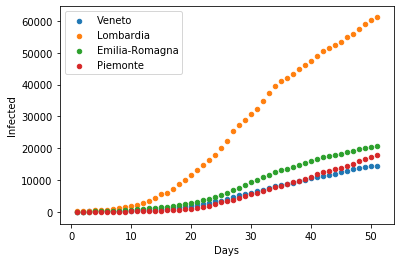

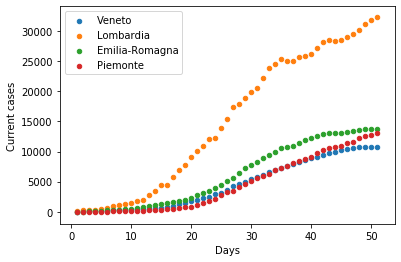

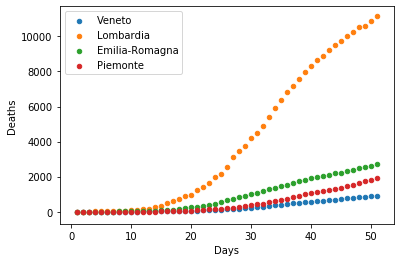

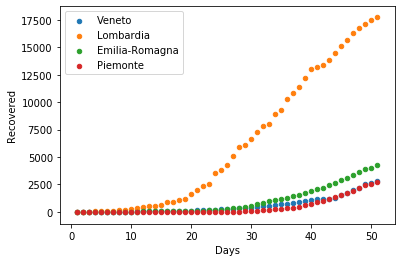

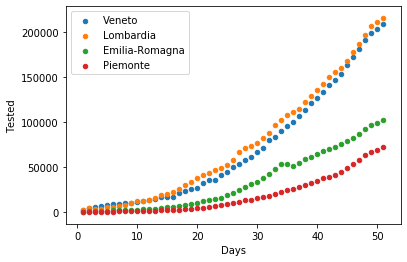

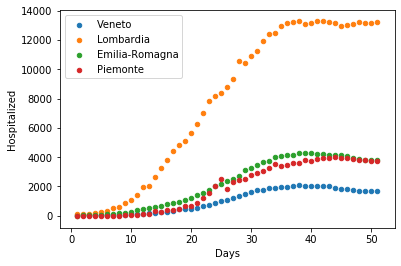

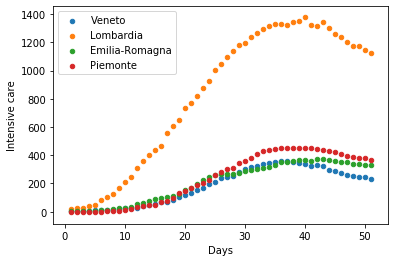

In [37]:
for fname, fname_lab in zip(fields_names, fields_names_lab):
    plot_comparison(regions_dataframe, nlist, fname, fname_lab)

This suggests that the number of tests performed plays a huge role in region-to-region comparison. Hence we should always normalize the number of infected to the number of tests performed. Let's build a dataframe merged together with geographical data to plot a map.

In [38]:
pos_tested = []
for name, data in r_timeseries.items():
    temp = np.array(data['totale_casi'])[-1]/np.array(data['tamponi'])[-1]
    pos_tested.append(temp*100)

pt_dict = dict(zip(['Regions','Percentage'],[regions_list, pos_tested]))
df = pd.DataFrame(pt_dict)

idx_trento = df.index[df['Regions'] == 'P.A. Trento']
idx_bolzano = df.index[df['Regions'] == 'P.A. Bolzano']

taa_p = (df.loc[idx_trento]['Percentage'].to_numpy() + df.loc[idx_bolzano]['Percentage'].to_numpy())/2
df.drop(idx_trento, inplace = True)
df.at[idx_bolzano, 'Regions'] = 'Trentino-Alto Adige'
df.at[idx_bolzano, 'Percentage'] = taa_p

In [39]:
fp = '../italia/ConfiniRegionali/ConfiniRegionali.shp'
map_df = gpd.read_file(fp)

merged_ppos = map_df.set_index('DEN_REG').join(df.set_index('Regions'))

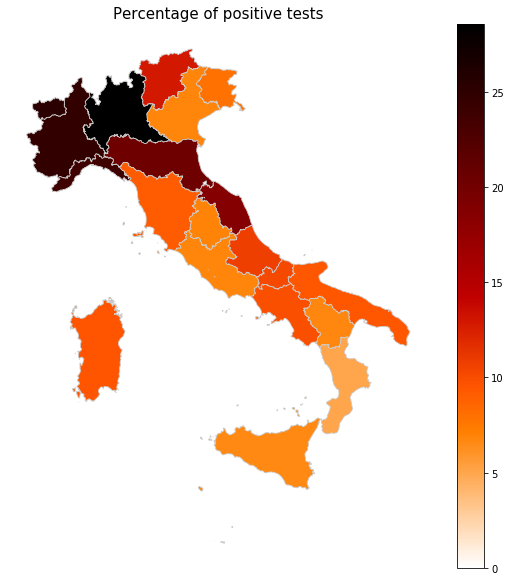

In [40]:
variable = 'Percentage'
fig, ax = plt.subplots(1,figsize=(10,10))

merged_ppos.plot(column = variable, cmap = 'gist_heat_r', linewidth = 0.8, ax = ax,
            edgecolor = '0.8', vmin = 0, legend = True)
ax.axis('off')
ax.set_title('Percentage of positive tests', fontdict={'fontsize':'15'})
plt.savefig('map.jpg', dpi = 300, bbox_inches = 'tight')

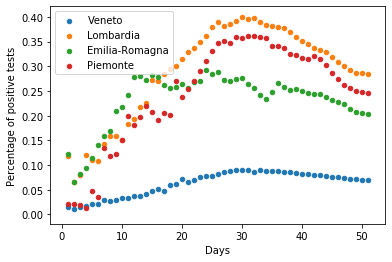

In [41]:
for name in nlist:
    data = np.array(regions_dataframe.at[name, 'totale_casi'])/np.array(regions_dataframe.at[name, 'tamponi'])
    plt.scatter(np.arange(1,len(data)+1, 1), data, label = name, s = 20)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Percentage of positive tests')
plt.savefig('tamponi.png', dpi = 300)
plt.show()

The percentage is consistently decreasing, meaning that the outbreak size is probably growing smaller. Notice the peak in most regions. Veneto is probably the one that performed best, given the steady rate, and the numbers there probably reflect the real size of the epidemic in the region.

We can also try different things. Let's look at the current situation and at the day-by-day increase.

In [39]:
def get_current_df(regions_dataframe, delay_day = 0):
    df = copy.deepcopy(regions_dataframe)
    for index, row in df.iterrows():
        for column in df:
            df.loc[index][column] = (row[column][-1-delay_day])
            
    idx_trento = 'P.A. Trento'
    idx_bolzano = 'P.A. Bolzano'
        
    for fname in df:
        taa = df.loc[idx_trento][fname] + df.loc[idx_bolzano][fname]
        df.at[idx_bolzano, fname] = taa
      
    df.drop(idx_trento, inplace = True)
    df = df.rename(index={'P.A. Bolzano':'Trentino-Alto Adige'}) 
    df = df.rename(index={'Emilia Romagna':'Emilia-Romagna'}) 

    return df

current_df = get_current_df(regions_dataframe)
current_df.sort_values('deceduti', ascending = False)

,totale_casi,totale_positivi,deceduti,dimessi_guariti,tamponi,totale_ospedalizzati,terapia_intensiva
Lombardia,61326,32363,11142,17821,214870,13199,1122
Emilia-Romagna,20752,13778,2705,4269,101896,3801,328
Piemonte,17690,13055,1927,2708,71678,3762,367
Veneto,14432,10736,906,2790,208878,1660,233
Liguria,5808,3466,793,1549,24446,1100,133
Marche,5426,3095,728,1603,29160,1043,106
Toscana,7527,6352,538,637,82269,1227,225
Trentino-Alto Adige,5325,3646,524,1155,43231,595,93
Lazio,5111,4022,300,789,74650,1543,199
Puglia,3118,2552,278,288,33071,673,62


In [40]:
it_current = pd.DataFrame(current_df.sum())
it_current.columns = ['Italia']
it_current.T

,totale_casi,totale_positivi,deceduti,dimessi_guariti,tamponi,totale_ospedalizzati,terapia_intensiva
Italia,162488.0,104291.0,21067.0,37130.0,1073689.0,31197.0,3186.0


In [41]:
def get_increment_df(regions_dataframe, delay_day = 0):
    df = copy.deepcopy(regions_dataframe)
    for index, row in df.iterrows():
        for column in df:
            df.loc[index][column] = np.diff(row[column])[-1-delay_day]
            
    idx_trento = 'P.A. Trento'
    idx_bolzano = 'P.A. Bolzano'
        
    for fname in df:
        taa = df.loc[idx_trento][fname] + df.loc[idx_bolzano][fname]
        df.at[idx_bolzano, fname] = taa
      
    df.drop(idx_trento, inplace = True)
    df = df.rename(index={'P.A. Bolzano':'Trentino-Alto Adige'}) 
    df = df.rename(index={'Emilia Romagna':'Emilia-Romagna'}) 

    df.columns = ['inc_' + s for s in df.columns.to_list()]
    
    return df

increment_df = get_increment_df(regions_dataframe)
increment_df.sort_values('inc_totale_casi', ascending = False)

,inc_totale_casi,inc_totale_positivi,inc_deceduti,inc_dimessi_guariti,inc_tamponi,inc_totale_ospedalizzati,inc_terapia_intensiva
Lombardia,1012,428,241,343,3778,28,-21
Piemonte,556,290,101,165,2508,39,-12
Emilia-Romagna,312,-40,90,262,2849,-20,-3
Liguria,212,101,33,78,1317,-126,-5
Veneto,181,-30,24,187,5801,-12,-12
Lazio,143,102,16,25,1904,29,-1
Toscana,137,95,20,22,1380,10,0
Campania,99,32,12,55,1324,14,2
Puglia,53,40,11,2,1149,2,-9
Trentino-Alto Adige,50,29,12,9,488,-18,-4


In [42]:
it_inc = pd.DataFrame(increment_df.sum())
it_inc.columns = ['Italia']
it_inc.T

,inc_totale_casi,inc_totale_positivi,inc_deceduti,inc_dimessi_guariti,inc_tamponi,inc_totale_ospedalizzati,inc_terapia_intensiva
Italia,2972.0,675.0,602.0,1695.0,26779.0,-86.0,-74.0


In [43]:
def plot_current(ax, fname, current_df, map_df, title):
    df = get_df_data(current_df, fname)
    
    merged = map_df.set_index('DEN_REG').join(df.set_index('Regions'))
    
    variable = fname
    merged.plot(column = variable, cmap = 'gist_heat_r', linewidth = 0.8, ax = ax,
                edgecolor = '0.8', vmin = 0, legend = True)
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize':'15'})

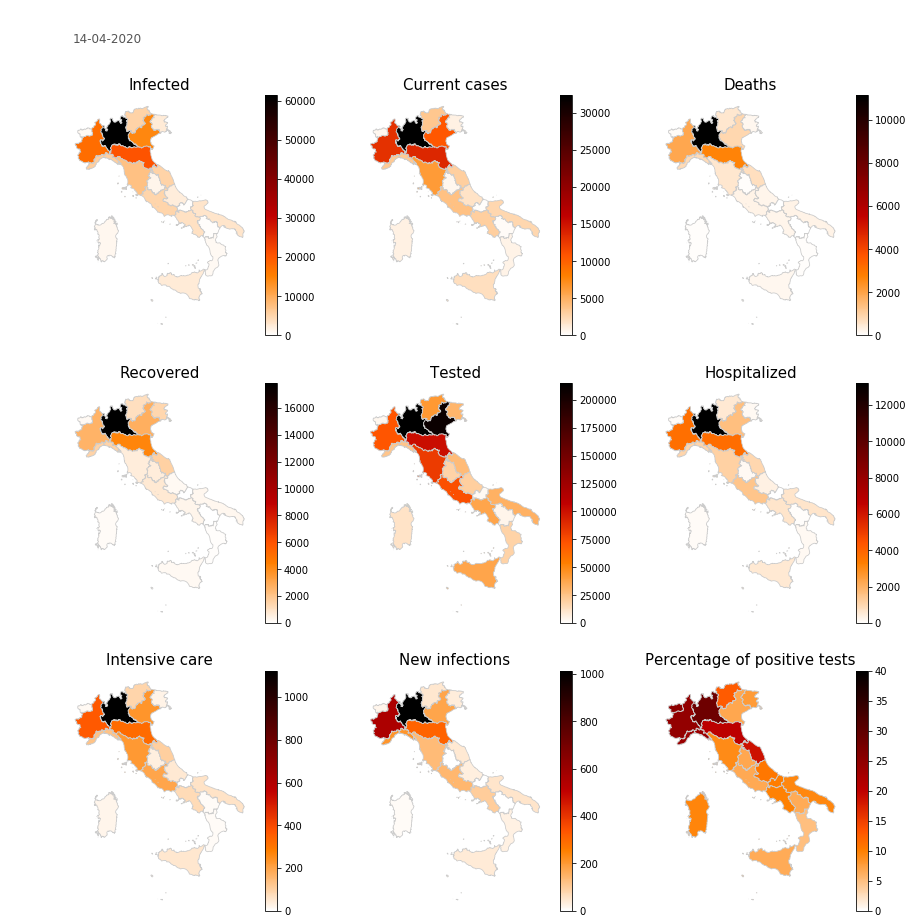

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15,15))

#names_plot = ['Totale', 'Attualmente positivi', 'Deceduti', 'Dimessi',
#              'Tamponi', 'Ospedalizzati', 'Terapia intensiva']

names_plot = ['Infected', 'Current cases', 'Deaths', 'Recovered', 'Tested', 'Hospitalized', 'Intensive care']


for i, fname, title in zip(np.ndenumerate(np.zeros((3,3))), fields_names, names_plot):
    plot_current(ax[i[0]], fname, current_df, map_df, title)

plot_current(ax[2,1], 'inc_totale_casi', increment_df, map_df, 'New infections')

variable = 'Percentage'
vmin, vmax  = 0,40
merged_ppos.plot(column = variable, cmap = 'gist_heat_r', linewidth = 0.8, ax = ax[2,2],
            edgecolor = '0.8', vmin = vmin, vmax = vmax, legend = True)
ax[2,2].axis('off')
ax[2,2].set_title('Percentage of positive tests', fontdict={'fontsize':'15'})

plt.annotate(datetime.today().strftime('%d-%m-%Y'), xy=(0.08,0.95),  xycoords='figure fraction',
             horizontalalignment='left', verticalalignment='bottom',
             fontsize=12, color='#555555')
plt.savefig('tot.png', dpi = 300, bbox_inches = 'tight')

Another interesting metric is the number of hospitalizations with respect to the number of tests performed, since it is more likely that a sick person is tested and thus hospitalized. 

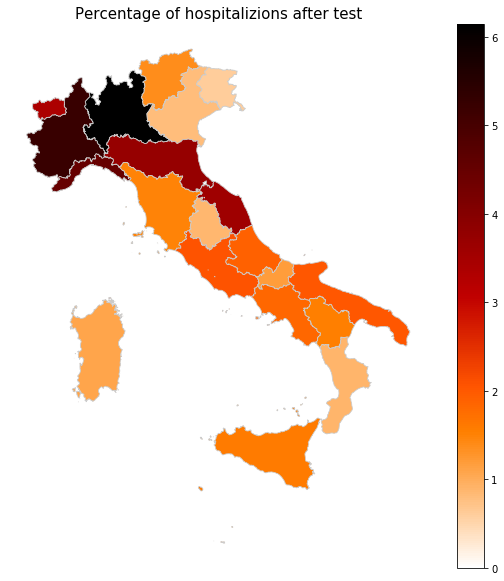

In [45]:
hosp_to_test = []
for rname in current_df.index.to_list():
    hosp_to_test.append(current_df.at[rname,'totale_ospedalizzati']*100/current_df.at[rname, 'tamponi'])
    
ht_dict = dict(zip(['Regions','percentuale_ospedalizzati'],[current_df.index.to_list(), hosp_to_test]))
ht_df = pd.DataFrame(ht_dict)
ht_df.set_index('Regions', inplace = True)

fig, ax = plt.subplots(1,figsize=(10,10))
plot_current(ax, 'percentuale_ospedalizzati', ht_df, map_df, 'Percentage of hospitalizions after test')

In [46]:
get_increment_df(regions_dataframe, delay_day = 10)

,inc_totale_casi,inc_totale_positivi,inc_deceduti,inc_dimessi_guariti,inc_tamponi,inc_totale_ospedalizzati,inc_terapia_intensiva
Trentino-Alto Adige,144,86,13,45,1939,12,2
Umbria,31,7,2,22,1195,-2,-4
Valle d'Aosta,29,0,12,17,168,-24,-2
Calabria,8,0,4,4,706,-7,-2
Puglia,58,24,9,25,1053,9,30
Lazio,157,97,13,47,848,47,5
Piemonte,813,563,85,165,2900,139,-2
Basilicata,3,-3,0,6,143,3,0
Lombardia,1598,1031,345,222,6826,145,-55
Abruzzo,65,55,7,3,947,-12,-5


In [47]:
dmax = len(r_timeseries['Veneto']['totale_casi'])

def plot_day_increase(regions_dataframe, fname, title, map_df, d = 0):
    
    idf = get_increment_df(regions_dataframe, delay_day = d)
    cdf = get_current_df(regions_dataframe, delay_day = d + 1)
    
    increase = []
    for rname in cdf.index.to_list():
        increase.append(idf['inc_' + fname][rname]/cdf[fname][rname]*100)
    
    dfname = 'aumento_giornaliero_' + fname
    
    inc_dict = dict(zip(['Regions', dfname],[cdf.index.to_list(), increase]))
    inc_df = pd.DataFrame(inc_dict)
    inc_df.set_index('Regions', inplace = True)

    fig, ax = plt.subplots(1,figsize=(10,10))
    plot_current(ax, dfname, inc_df, map_df, title)

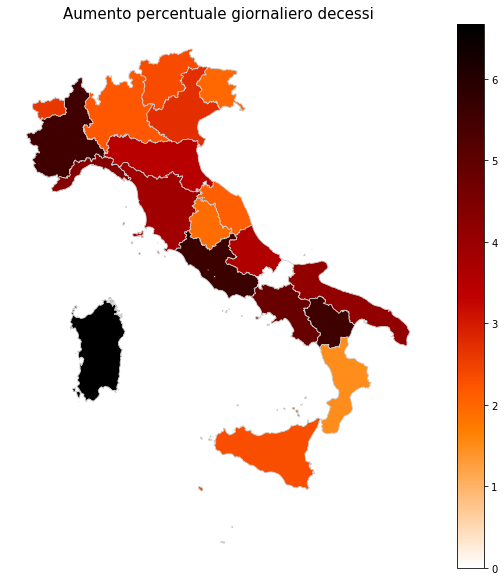

In [48]:
plot_day_increase(regions_dataframe, 'deceduti', "Aumento percentuale giornaliero decessi", map_df, d = 0)

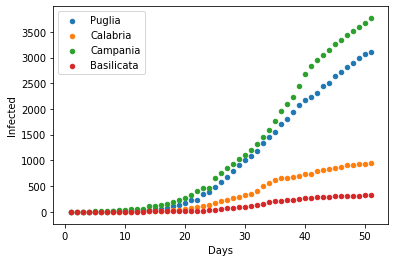

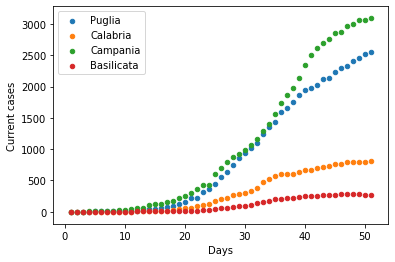

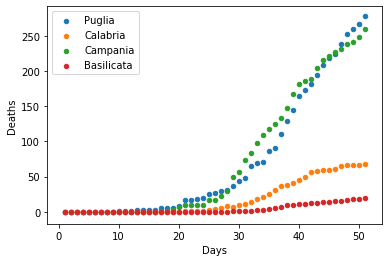

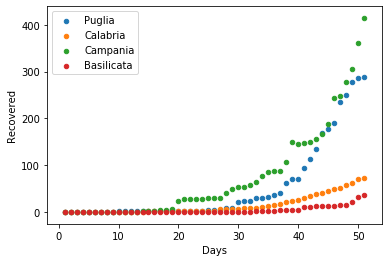

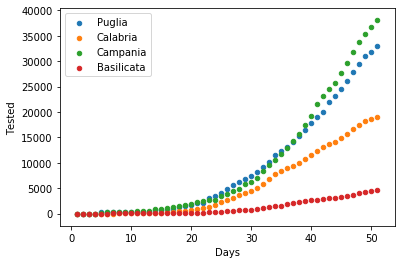

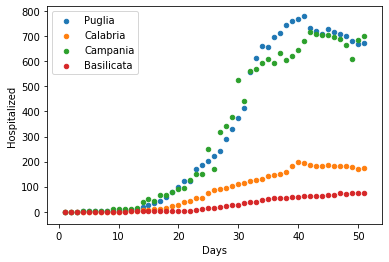

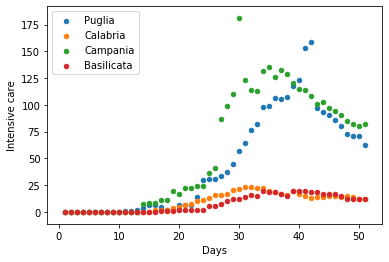

In [49]:
nlist = ['Puglia', 'Calabria', 'Campania', 'Basilicata']
for fname, fname_lab in zip(fields_names, fields_names_lab):
    plot_comparison(regions_dataframe, nlist, fname, fname_lab)